## SF crime data analysis and modeling

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import os
import math
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from ggplot import *
import warnings
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [0]:
data_path = "dbfs:/FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"

In [0]:
crime_data_lines = sc.textFile(data_path)
df_crimes = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])
header = df_crimes.first()
print(header)

#remove the first line of data
crimes = df_crimes.filter(lambda x: x != header)

#get the first line of data
display(df_crimes.take(3))

#get the total number of data 
print("Totol Crime Counts: ", crimes.count())

Totol Crime Counts: 2215024

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_raw = spark.read.format("csv").option("header", "true").load(data_path)
display(df_raw)
df_raw.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,:@computed_region_yftq_j783,:@computed_region_p5aj_wyqh,:@computed_region_rxqg_mtj9,:@computed_region_bh8s_q3mv,:@computed_region_fyvs_ahh9,:@computed_region_9dfj_4gjx,:@computed_region_n4xg_c4py,:@computed_region_4isq_27mq,:@computed_region_fcz8_est8,:@computed_region_pigm_ib2e,:@computed_region_9jxd_iqea,:@computed_region_6pnf_4xz7,:@computed_region_6ezc_tdp2,:@computed_region_h4ep_8xdi,:@computed_region_nqbw_i6c3,:@computed_region_2dwj_jsy4
180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,05/15/2018,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.41191202732877,37.77520656149669,"(37.77520656149669, -122.41191202732877)",18036228907023,32,1,10,34,8,2,9,28853,34,null,1,null,1,null,null,2,null,null,1,null
180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,05/15/2018,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.41925789481357,37.77514629165388,"(37.77514629165388, -122.41925789481357)",18036094864020,32,1,10,20,8,2,9,28853,19,null,1,null,1,null,8,2,1,1,1,null
180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.41781255878655,37.757100579642824,"(37.757100579642824, -122.41781255878655)",18036087926150,53,3,2,20,2,4,7,28859,19,13,null,15,3,15,null,2,null,null,3,null
180360879,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.41781255878655,37.757100579642824,"(37.757100579642824, -122.41781255878655)",18036087965010,53,3,2,20,2,4,7,28859,19,13,null,15,3,15,null,2,null,null,3,null
180360879,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.41781255878655,37.757100579642824,"(37.757100579642824, -122.41781255878655)",18036087965015,53,3,2,20,2,4,7,28859,19,13,null,15,3,15,null,2,null,null,3,null
180360829,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,05/15/2018,01:27,MISSION,NONE,700 Block of SHOTWELL ST,-122.41561725232026,37.75641376904809,"(37.75641376904809, -122.41561725232026)",18036082965016,53,3,2,20,2,4,7,28859,19,null,null,null,3,null,null,2,null,null,3,null
180360835,ROBBERY,"ROBBERY, BODILY FORCE",Tuesday,05/15/2018,01:25,SOUTHERN,"ARREST, BOOKED",0 Block of 6TH ST,-122.41004163181597,37.781953653725715,"(37.781953653725715, -122.41004163181597)",18036083503074,32,5,10,34,14,2,9,28853,34,17,1,18,1,18,7,2,1,1,1,null
180360835,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Tuesday,05/15/2018,01:25,SOUTHERN,"ARREST, BOOKED",0 Block of 6TH ST,-122.41004163181597,37.781953653725715,"(37.781953653725715, -122.41004163181597)",18036083516710,32,5,10,34,14,2,9,28853,34,17,1,18,1,18,7,2,1,1,1,null
180360794,LIQUOR LAWS,MISCELLANEOUS LIQOUR LAW VIOLATION,Tuesday,05/15/2018,00:19,PARK,"ARREST, BOOKED",1500 Block of HAIGHT ST,-122.44776112231955,37.76984648754153,"(37.76984648754153, -122.44776112231955)",18036079417030,25,7,11,3,15,5,11,29492,9,22,null,24,null,25,null,1,null,null,null,null
180360794,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,05/15/2018,00:19,PARK,"ARREST, BOOKED",1500 Block of HAIGHT ST,-122.44776112231955,37.76984648754153,"(37.76984648754153, -122.44776112231955)",18036079462050,25,7,11,3,15,5,11,29492,9,22,null,24,null,25,null,1,null,null,null,null


In [0]:
# Cleaning raw data
df_raw = df_raw.withColumn('X', df_raw["X"].cast('double'))\
               .withColumn('Y', df_raw["Y"].cast('double'))\
               .withColumn('Day', to_date(col("Date"), "MM/dd/yyyy"))\
               .withColumn('Hour', hour(df_raw["Time"]))

df_clean = df_raw.drop('IncidntNum','Descript','Address','PdId','Time','Date', ':@computed_region_yftq_j783', ':@computed_region_p5aj_wyqh', ':@computed_region_rxqg_mtj9', ':@computed_region_bh8s_q3mv', ':@computed_region_fyvs_ahh9', ':@computed_region_9dfj_4gjx', ':@computed_region_n4xg_c4py', ':@computed_region_4isq_27mq', ':@computed_region_fcz8_est8', ':@computed_region_pigm_ib2e', ':@computed_region_9jxd_iqea', ':@computed_region_6pnf_4xz7', ':@computed_region_6ezc_tdp2', ':@computed_region_h4ep_8xdi', ':@computed_region_nqbw_i6c3', ':@computed_region_2dwj_jsy4')\
                 .withColumnRenamed('Day','Date')

display(df_clean)


Category,DayOfWeek,PdDistrict,Resolution,X,Y,Location,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Date,Hour
VEHICLE THEFT,Tuesday,SOUTHERN,NONE,-122.41191202732877,37.77520656149669,"(37.77520656149669, -122.41191202732877)",32,1,10,34,2018-05-15,10
NON-CRIMINAL,Tuesday,SOUTHERN,NONE,-122.41925789481357,37.77514629165388,"(37.77514629165388, -122.41925789481357)",32,1,10,20,2018-05-15,4
OTHER OFFENSES,Tuesday,MISSION,"ARREST, BOOKED",-122.41781255878655,37.757100579642824,"(37.757100579642824, -122.41781255878655)",53,3,2,20,2018-05-15,2
OTHER OFFENSES,Tuesday,MISSION,"ARREST, BOOKED",-122.41781255878655,37.757100579642824,"(37.757100579642824, -122.41781255878655)",53,3,2,20,2018-05-15,2
OTHER OFFENSES,Tuesday,MISSION,"ARREST, BOOKED",-122.41781255878655,37.757100579642824,"(37.757100579642824, -122.41781255878655)",53,3,2,20,2018-05-15,2
OTHER OFFENSES,Tuesday,MISSION,NONE,-122.41561725232026,37.75641376904809,"(37.75641376904809, -122.41561725232026)",53,3,2,20,2018-05-15,1
ROBBERY,Tuesday,SOUTHERN,"ARREST, BOOKED",-122.41004163181597,37.781953653725715,"(37.781953653725715, -122.41004163181597)",32,5,10,34,2018-05-15,1
DRUG/NARCOTIC,Tuesday,SOUTHERN,"ARREST, BOOKED",-122.41004163181597,37.781953653725715,"(37.781953653725715, -122.41004163181597)",32,5,10,34,2018-05-15,1
LIQUOR LAWS,Tuesday,PARK,"ARREST, BOOKED",-122.44776112231955,37.76984648754153,"(37.76984648754153, -122.44776112231955)",25,7,11,3,2018-05-15,0
WARRANTS,Tuesday,PARK,"ARREST, BOOKED",-122.44776112231955,37.76984648754153,"(37.76984648754153, -122.44776112231955)",25,7,11,3,2018-05-15,0


In [0]:
print("Total Number of Crimes from 2003 - 2018: ", df_clean.count())

Total Number of Crimes from 2003 - 2018: 2215024

#### Quick View (OLAP):

In [0]:
# Overall
df1 = df_clean.groupBy('category').count().orderBy('count', ascending = False)
df1 = df1.toPandas()
display(df1)

category,count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


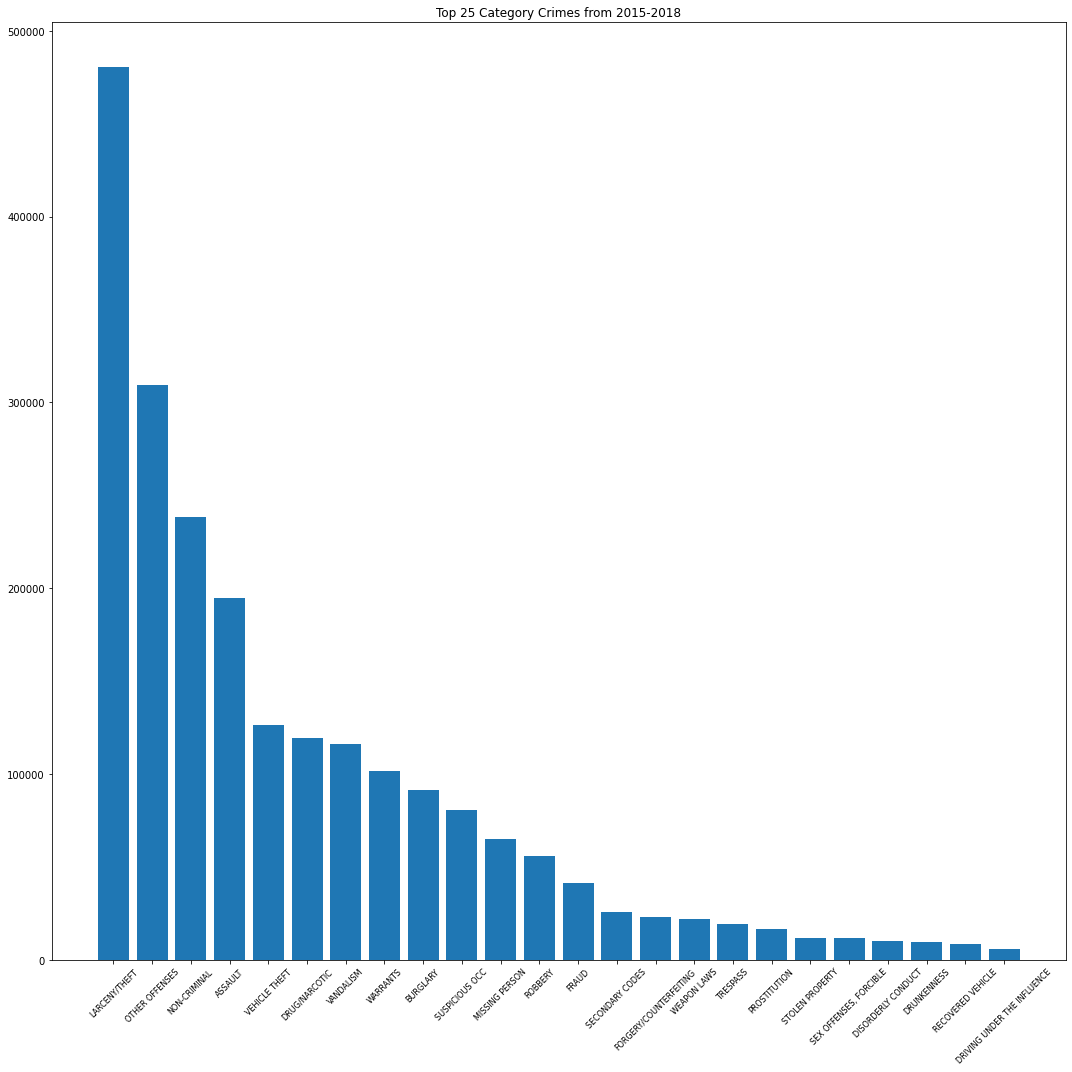

In [0]:
# Overall 
fig, axes = plt.subplots(1,1, figsize=(15,15))
axes.bar(range(1,25), df1['count'][0:24], align='center')
axes.set_xticks(range(1,25))
axes.set_xticklabels(df1['category'][0:24], rotation=45, fontsize=8)

axes.set_title("Top 25 Category Crimes from 2015-2018")
fig.tight_layout()
display(fig)

Counts the number of crimes for different district, and visualize results

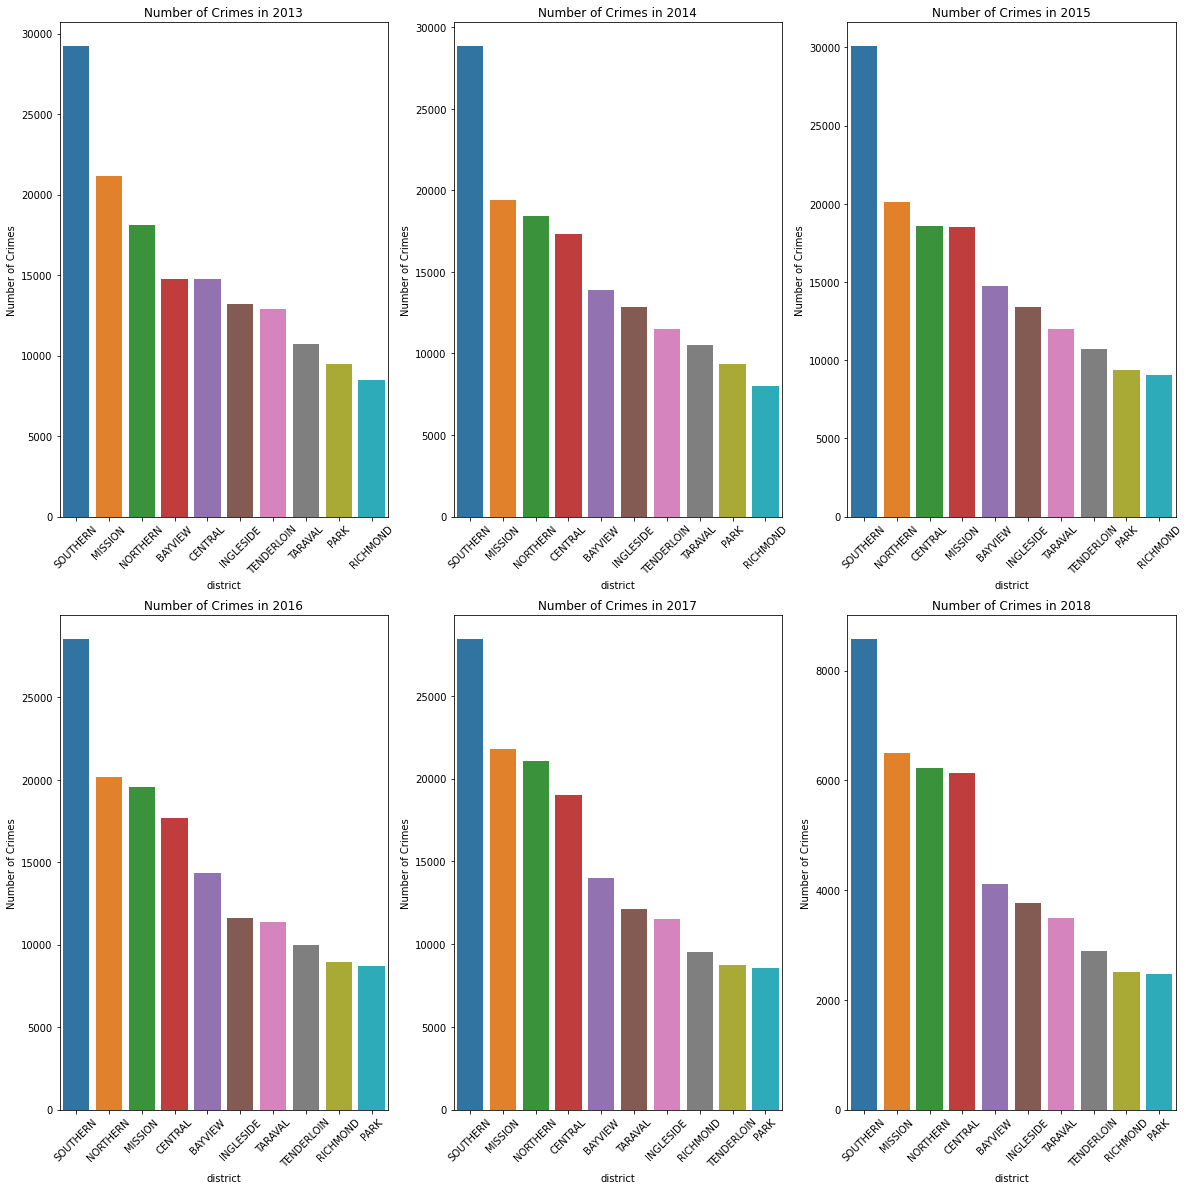

In [0]:
fig, axes = plt.subplots(2,3, figsize=(20,20))

df2 = []
year_mark = range(2013,2019)
for i in range(0,6):
  df2.append(df_clean.filter(year(col('Date'))==year_mark[i])\
             .groupBy(df_clean['PdDistrict'].alias('district'))\
             .count().orderBy('count', ascending=False).dropna().toPandas())
  sns.barplot(x='district',y='count',data=df2[i], ax = axes[i//3][i%3])
  axes[i//3][i%3].set_xticklabels(df2[i]['district'],rotation=45,fontsize=10)
  axes[i//3][i%3].set_ylabel('Number of Crimes')
  axes[i//3][i%3].set_title('Number of Crimes in {0}'.format(year_mark[i]))
display(fig)
             

In [0]:
# Overall
crime_count_by_district = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC")
display(crime_count_by_district)

PdDistrict,Count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


Count the number of crimes each "Sunday" at "SF downtown" from 2013 - 2018

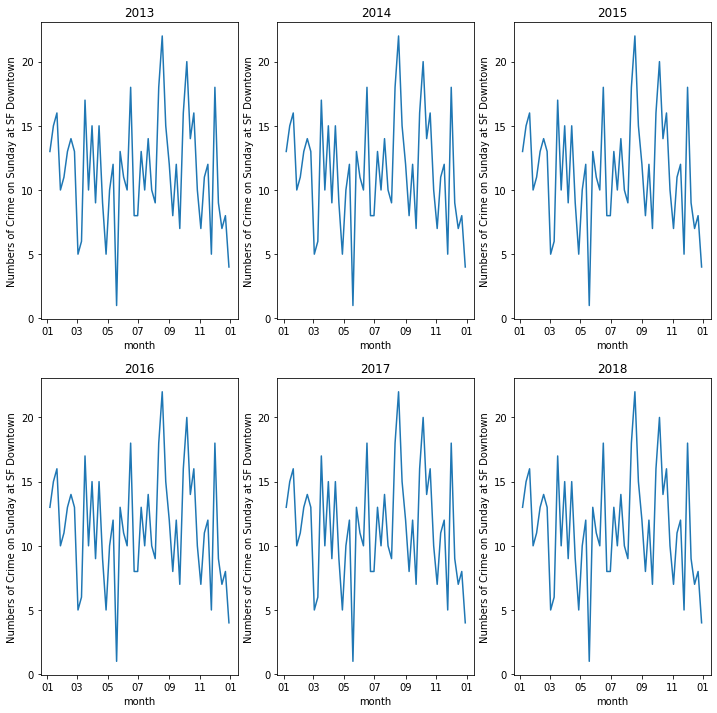

In [0]:
import matplotlib.dates as mdates
monthsFmt = mdates.DateFormatter('%m')

fig, axes = plt.subplots(2,3, figsize=(12,12))

#fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,10))
df3 = []
year_mark = range(2013,2019)
for i in range(0,6):
  df3.append(df_clean.filter(df_clean.X > -122.41)\
                     .filter(df_clean.X < -122.40) \
                     .filter(df_clean.Y > 37.79) \
                     .filter(df_clean.Y < 37.80) \
                     .filter(year(col('Date'))==2013) \
                     .filter(col('DayOfWeek')=='Sunday') \
                     .groupBy('Date').count().orderBy('Date').toPandas())
  axes[i//3][i%3].plot(df3[i]['Date'],df3[i]['count'])
  axes[i//3][i%3].xaxis.set_major_formatter(monthsFmt)
  axes[i//3][i%3].set_title('{0}'.format(year_mark[i]))
  axes[i//3][i%3].set_xlabel('month')
  axes[i//3][i%3].set_ylabel('Numbers of Crime on Sunday at SF Downtown')

display(fig)
  

Analysis the number of crime in each month of 2015, 2016, 2017, 2018.

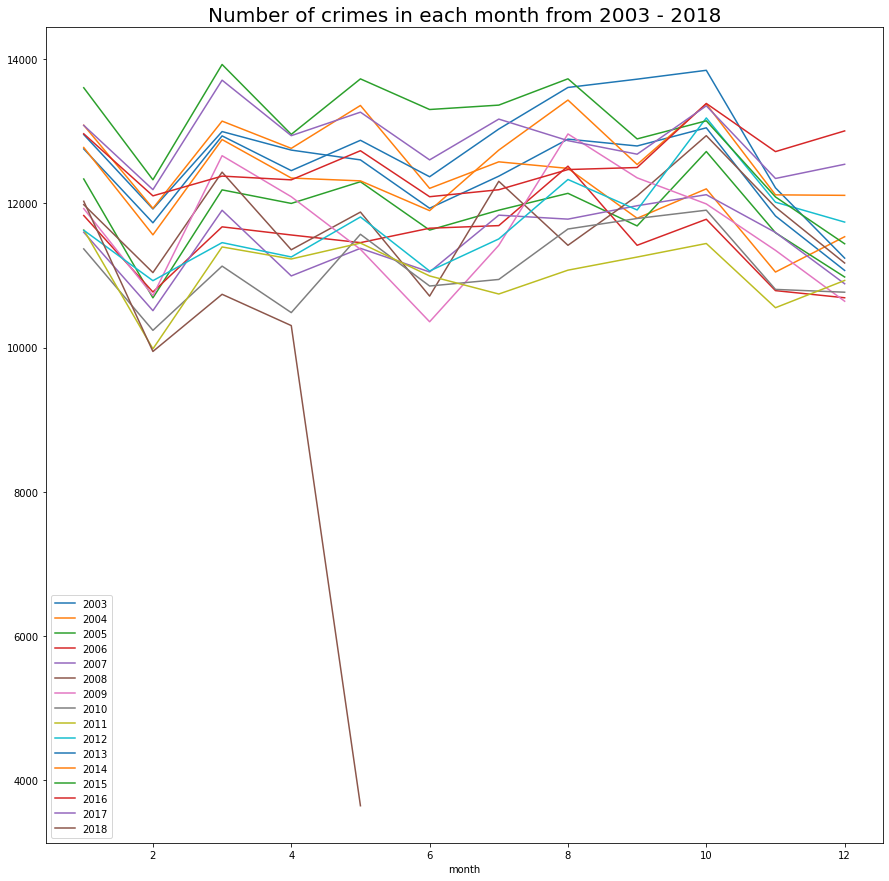

In [0]:
df4 = df_clean.groupBy(year(col('Date')).alias('year'), month(col('Date')).alias('month')).count().orderBy('year','month').toPandas()
df4_res = df4.pivot(index='month', columns='year', values='count')
ax = df4_res.plot(kind='line', figsize=(15,15))
ax.legend(loc='best')
ax.set_title('Number of crimes in each month from 2003 - 2018', fontsize=20)
display()


Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15.

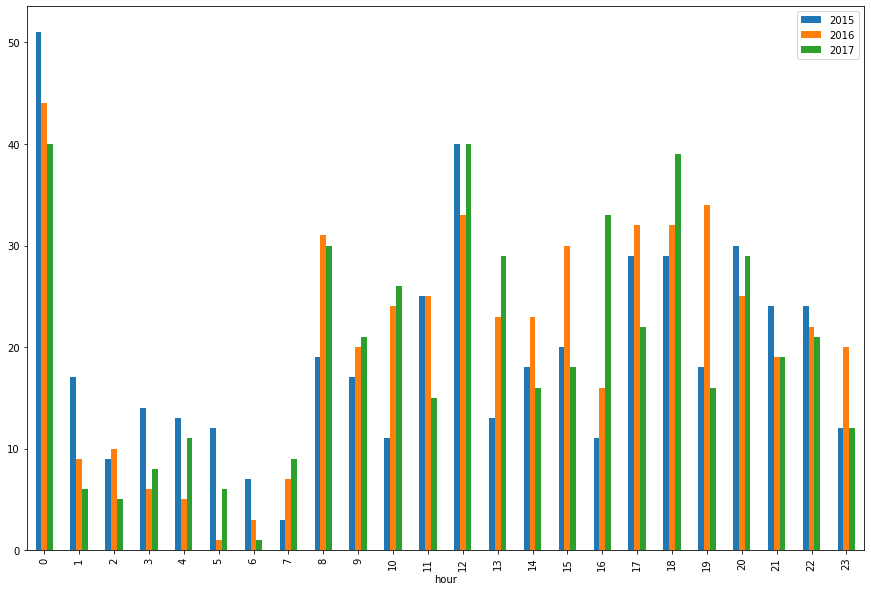

In [0]:
df_15 = df_clean.filter("Date == '2015-02-01'").groupBy('hour').count().orderBy('hour').withColumnRenamed('count','2015').toPandas().set_index('hour')
df_16 = df_clean.filter("Date == '2016-02-01'").groupBy('hour').count().orderBy('hour').withColumnRenamed('count','2016').toPandas().set_index('hour')
df_17 = df_clean.filter("Date == '2017-02-01'").groupBy('hour').count().orderBy('hour').withColumnRenamed('count','2017').toPandas().set_index('hour')

df5 = pd.concat([df_15,df_16,df_17], axis=1)
df5.plot(kind='bar', figsize=(15,10))
display()

Find out the top 3 Dangerous disricts and the crime event w.r.t category & time (hour)

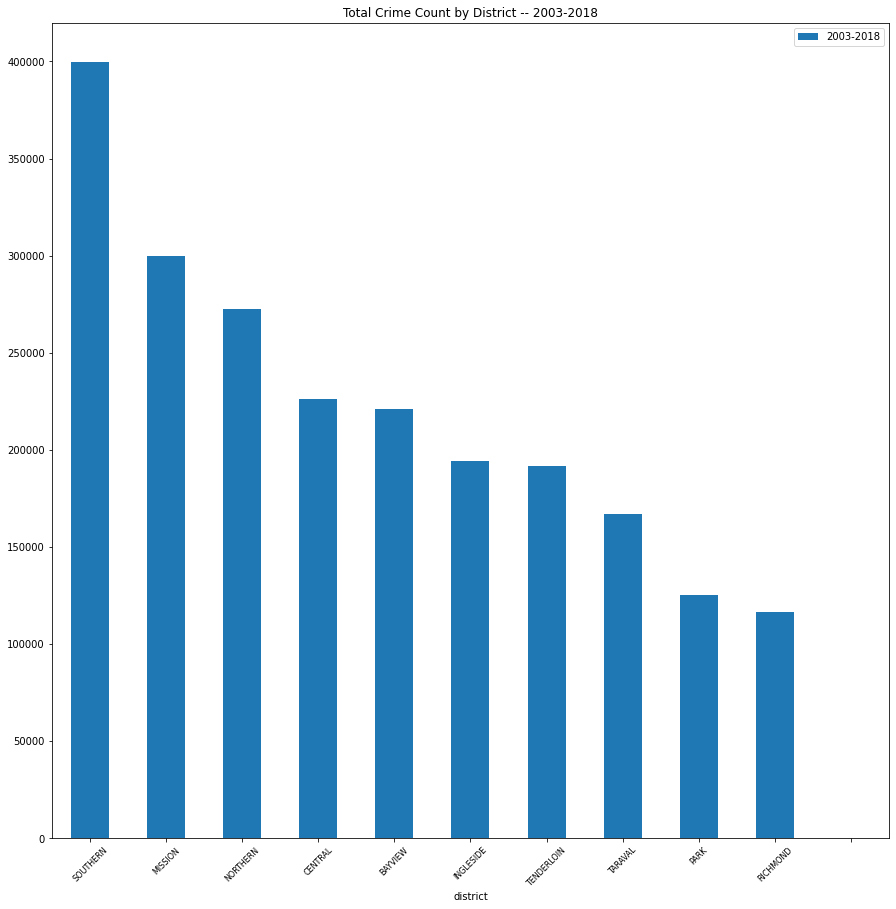

In [0]:
df6 = df_clean.withColumnRenamed('PdDistrict','district').groupBy('district').count().withColumnRenamed('count','2003-2018').orderBy('2003-2018', ascending=False).toPandas().set_index('district')
fig = df6.plot(kind='bar', figsize=(15,15))
xticklabels = list(df6.index)
fig.set_xticklabels(xticklabels, rotation=45, ha='center', fontsize=8)
fig.set_title('Total Crime Count by District -- 2003-2018')
display(fig)

Conclusion:
The result shows that the top 3 dangerous district would be: Southern, Mession & Northern

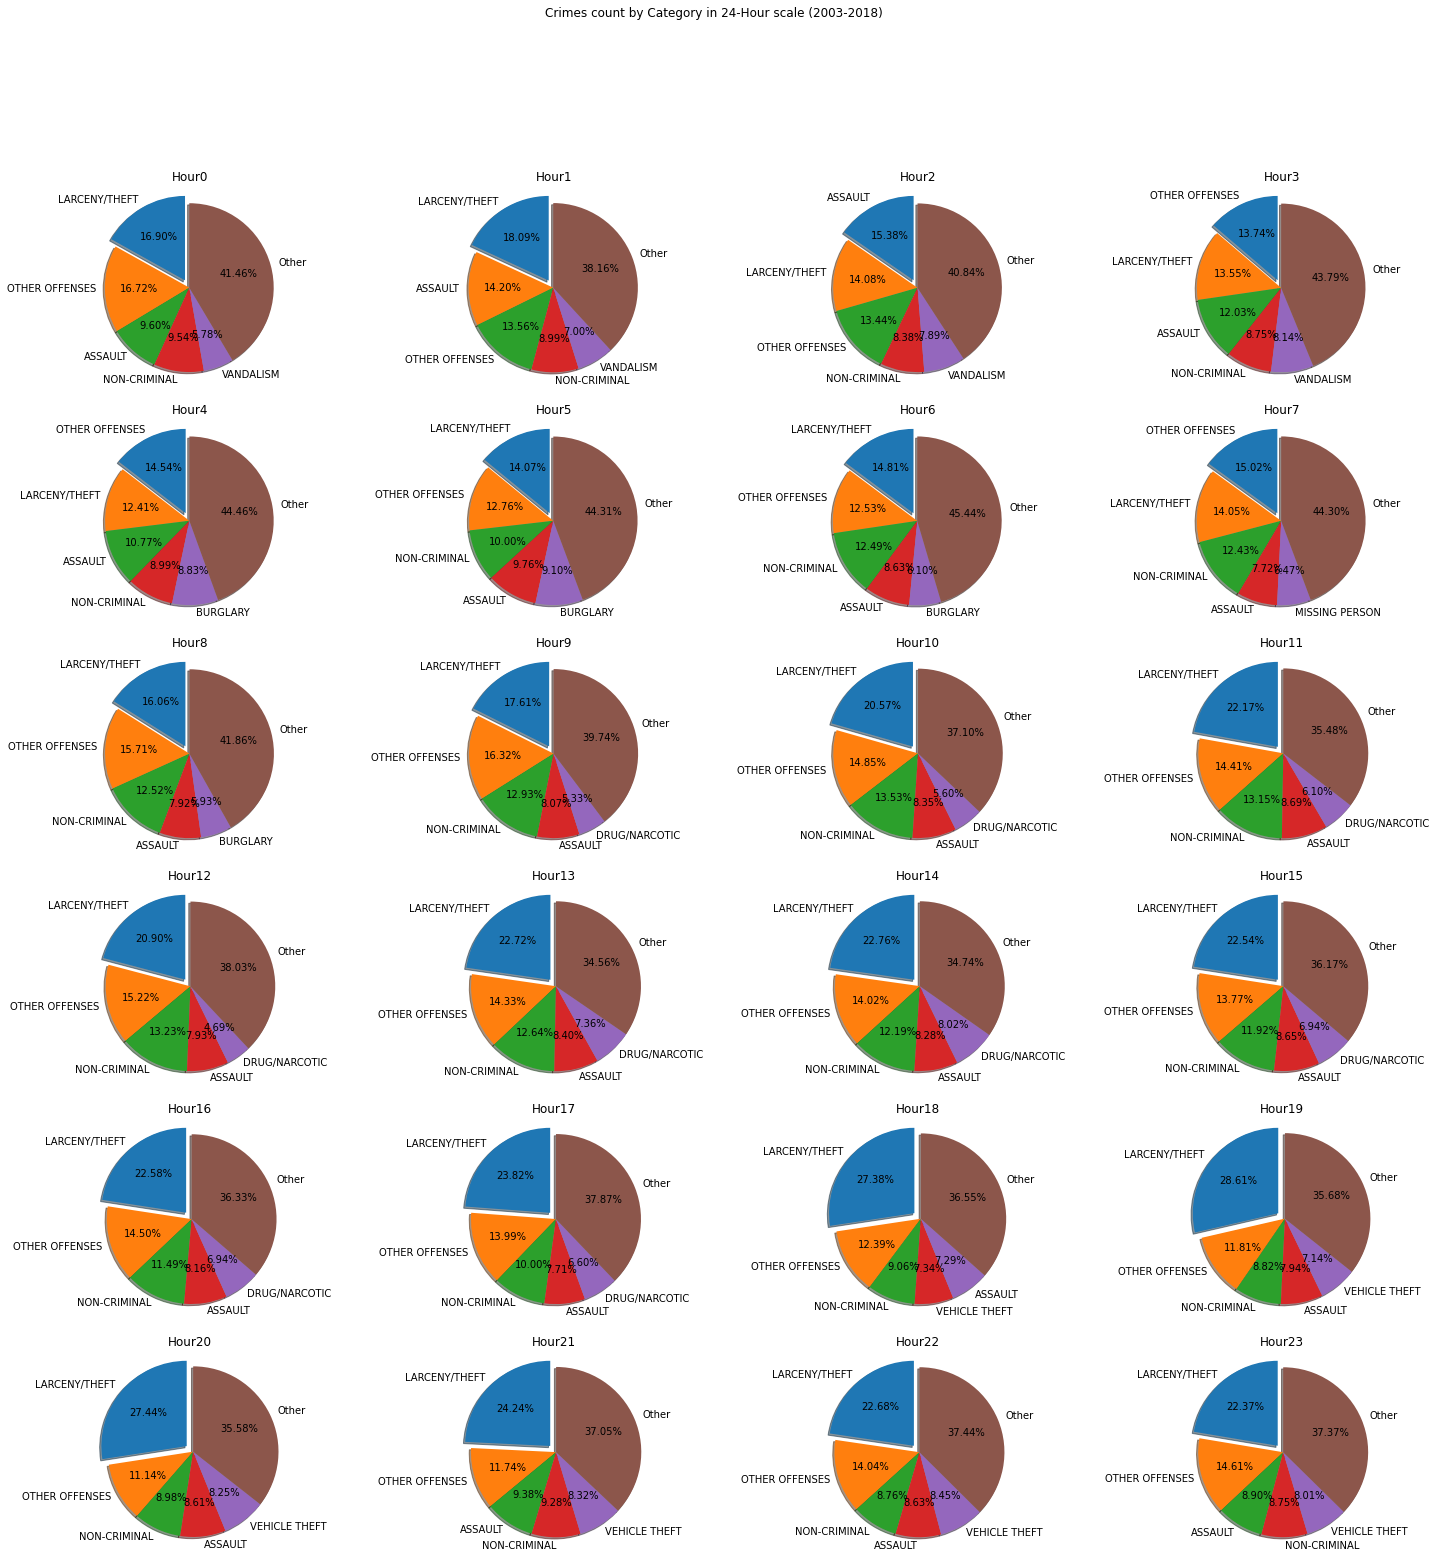

In [0]:
df6_hour = df_clean.select('*').groupBy('category', 'hour').count().orderBy('hour').toPandas()
df6_hour = df6_hour.pivot(index='category', columns='hour', values='count')
df6_hour = df6_hour.div(df6_hour.sum(axis=0), axis=1)

fig, axs = plt.subplots(6,4, figsize = (25,25))
for i in df6_hour.columns:
  labels = df6_hour[i].sort_values(ascending=False)[:5].index.tolist()
  values = df6_hour[i].sort_values(ascending=False)[:5].values
  labels.append('Other')
  explode = (0.1,0,0,0,0,0)
  values = np.append(values, 1-values.sum())
  axs[i//4][i%4].pie(values, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True,startangle=90)
  axs[i//4][i%4].axis('equal')
  axs[i//4][i%4].set_title('Hour{}'.format(i))
fig.suptitle('Crimes count by Category in 24-Hour scale (2003-2018)')
display()
  

For different category of crime, find the percentage of resolution.

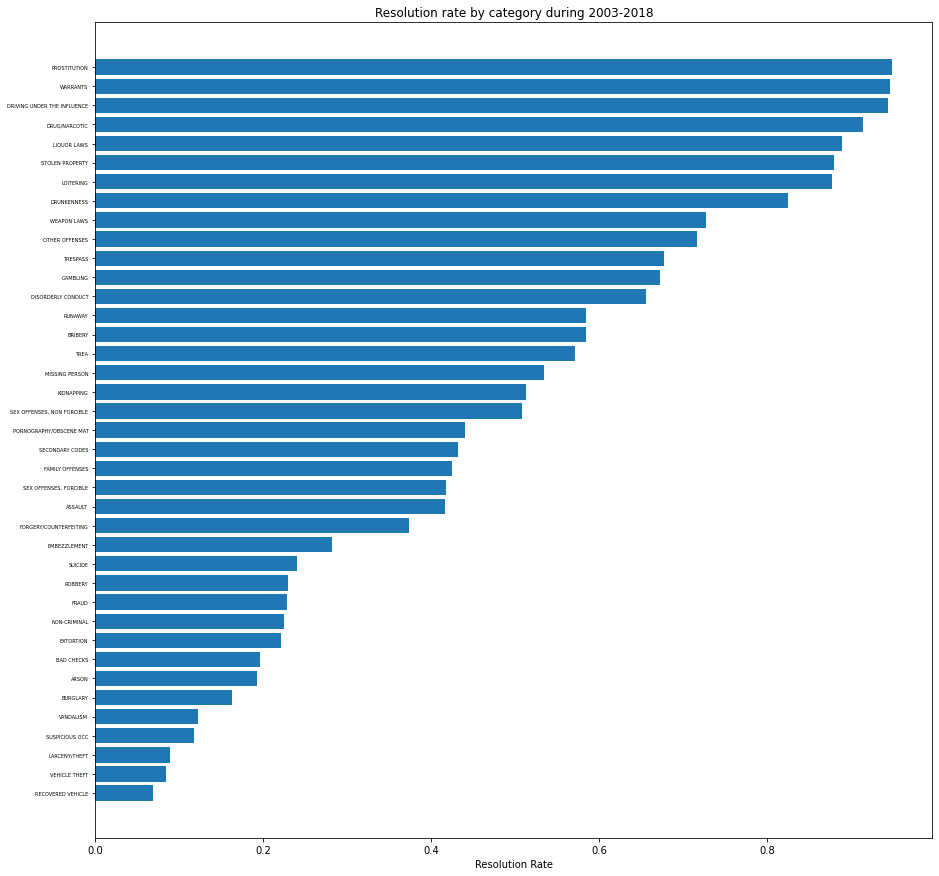

In [0]:
df7_all = df_clean.groupby('Category').count().withColumnRenamed('count', 'all').orderBy('all', ascending=False)
df7_not_null = df_clean.filter(df_clean['Resolution']!='NONE').groupby('Category').count().withColumnRenamed('count', 'resolved').orderBy('resolved',ascending= False)

df7 = df7_all.join(df7_not_null, 'Category').toPandas()
df7['resolution_rate'] = df7['resolved']/df7['all']
df7 = df7.set_index('Category')
df7 = df7.sort_values('resolution_rate', ascending=False)

fig7,ax7 = plt.subplots(figsize = (15,15))
labels = df7.index.tolist()
ax7.barh(np.arange(len(labels)), df7['resolution_rate'], align='center')
ax7.set_yticks(np.arange(len(labels)))
ax7.set_yticklabels(labels, fontsize=5)
ax7.invert_yaxis()
ax7.set_xlabel('Resolution Rate')
ax7.set_title('Resolution rate by category during 2003-2018')
display()

visualize the spatial distribution of crimes

In [0]:
df8 = df_clean.select(['X','Y'])
display(df8)

from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

vecAssembler = VectorAssembler(inputCols=["X", "Y"], outputCol="features")
kmeans = KMeans(k=5, seed=1)
pipeline = Pipeline(stages=[vecAssembler, kmeans])
model = pipeline.fit(df8)


df8_res = model.transform(df8)
df8_res = df8_res.toPandas()

X,Y
-122.41191202732877,37.77520656149669
-122.41925789481357,37.77514629165388
-122.41781255878655,37.757100579642824
-122.41781255878655,37.757100579642824
-122.41781255878655,37.757100579642824
-122.41561725232026,37.75641376904809
-122.41004163181597,37.781953653725715
-122.41004163181597,37.781953653725715
-122.44776112231955,37.76984648754153
-122.44776112231955,37.76984648754153


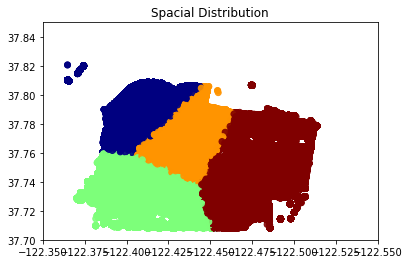

In [0]:
fig8, ax8 = plt.subplots()
ax8.scatter(df8_res['X'], df8_res['Y'], c=(df8_res['prediction']),cmap=plt.cm.jet, alpha=0.9)
ax8.set_xlim([-122.35, -122.55])
ax8.set_ylim([37.70, 37.85])
ax8.set_title("Spacial Distribution")
display()

### Rough Analysis. 
There are several findings can be drawn by going through the dataset. 
According to the above results:
1. Larceny/Theft would be in the majority of all crimes. 
2. 'Southern', 'Northern' and 'Mission' are the top three most dangerous districts.
3. March, August and December presents higher amount of crimes compared to other months, especically on sundays. 
4. The time range from 6pm to 11pm is on a relatively high crime surge, suggest visitors avoid unnecessary activities at night.
5. Cases related to traffic, drug and warrants present higher resolution rate than the others.